# Optimization

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

<div style="text-align: right">
<i>If there occur some changes in nature, the amount of action necessary for this change must be as small as possible.</i> 
<br>Maupertuis (sec XVIII)
</div>
  
**Optimization is the process of finding the best value from possible alternatives with regards to a certain criteria** ([Wikipedia](http://en.wikipedia.org/wiki/Mathematical_optimization)).  

Typically, such best value is the value that maximizes or minimizes the criteria. In this context, to solve a (mathematical) optimization problem is to find the maximum or minimum (a.k.a., a stationary point) of a function (and we can use maximum or minimum interchangeably because the maximum of a function is the minimum of the negative of that function).  
To solve an optimization problem, we first have to model the problem and define the objective, the variables, and the constraints of the problem. In optimization, these terms are usually defined as:

1. Objective function (or also, cost, loss, utility, or fitness function): a function describing what we want to optimize.  
2. Design variable(s): variables that will be manipulated to optimize the cost function.  
3. Constraint functions: a set of constraints, equalities or inequalities that constrains the possible solutions to possible values of the design variables (candidate solutions or feasible solutions or feasible set).

A feasible solution that minimizes (or maximizes) the objective function is called an optimal solution.

The optimization problem is the calculation of the minimum or maximum values of an objective function over a set of **unknown** possible values of the design variables.  
Even in case of a finite number of possible values of the objective function and design variables (e.g., after discretization and a manual or a grid search), in general the evaluation of the objective function is computationally expensive and should be avoided.  
Of note, even if there is no other option, a random search is in fact more efficient than a manual or a grid search! See [Bergstra, Bengio (2012)](http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf).

A typical problem of optimization: [Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem).

Read more about that in [Introduction to Optimization](http://neos-guide.org/content/optimization-introduction) from the  [NEOS Guide](http://neos-guide.org/).

## Some jargon in mathematical optimization

 - **Linear versus nonlinear optimization**: linear optimization refers to when the objective function and the constraints are linear mathematical functions. When the objective function is linear, an optimal solution is always found at the constraint boundaries and a local optimum is also a global optimum. See [Wikipedia 1](https://en.wikipedia.org/wiki/Linear_programming) and [Wikipedia 2](https://en.wikipedia.org/wiki/Nonlinear_programming).  
 - **Constrained versus unconstrained optimization**: in constrained optimization there are no constraints.  
 - **Convex optimization**: the field of optimization that deals with finding the minimum of convex functions (or the maximum of concave functions) over a convex constraint set. The convexity of a function facilitates the optimization because a local minimum must be a global minimum and first-order conditions (the first derivatives) are sufficient conditions for finding the optimal solution. Note that although convex optimization is a particular case of nonlinear optimization, it is a relatively simple optimization problem, with robust and mature methods of solution. See [Wikipedia](https://en.wikipedia.org/wiki/Convex_optimization).   
 - **Multivariate optimization**: optimization of a function of several variables.
 - **Multimodal optimization**: optimization of a function with several local minima to find the multiple (locally) optimal solutions, as opposed to a single best solution.  
 - **Multi-objective optimization**: optimization involving more than one objective function to be optimized simultaneously.  
 - **Optimal control**: finding a control law for a given system such that a certain optimality criterion is achieved. See [Wikipedia](https://en.wikipedia.org/wiki/Optimal_control).  
 - **Quadratic programming**: optimization of a quadratic function subject to linear constraints. See [Wikipedia](https://en.wikipedia.org/wiki/Quadratic_programming).   
 - **Simplex algorithm**: linear optimization algorithm that begins at a starting vertex and moves along the edges of the polytope (the feasible region) until it reaches the vertex of the optimum solution. See [Wikipedia](https://en.wikipedia.org/wiki/Simplex_algorithm).   

## Maxima and minima

In mathematics, the maximum and minimum of a function are the largest and smallest values that the function takes at a point either within a neighborhood (local) or on the function entire domain  (global) ([Wikipedia](http://en.wikipedia.org/wiki/Maxima_and_minima)).  

For a function of one variable, if the maximum or minimum of a function is not at the limits of the domain and if at least the first and second derivatives of the function exist, a maximum and minimum can be found as the point where the first derivative of the function is zero. If the second derivative on that point is positive, then it's a minimum, if it is negative, it's a maximum.

<div class='center-align'><figure><img src='./../images/maxmin.png' width=350 alt='minima and maxima of a function'/> <figcaption><center><i>Figure. Maxima and minima of a function of one variable.</i></center></figcaption> </figure></div>

 - Note that the requirement that the second derivative on the extremum to be positive for a minimum or negative for a maximum is sufficient but not a necessary condition. For instance, the function $f(x)=x^4$ has an extremum in $x=0$ since $f'(x)=4x^3$ and $f'(0)=0$, but its second derivative at $x=0$ is also zero: $f''(x)=12x^2;\: f''(0)=0$. In fact, the requirement is that the first non-zero derivative on that point should be positive for a minimum or negative for a maximum: $f''''(0)=24$; the extremum is a minimum.

Let's now apply optimization to solve a problem with a univariate function.

In [1]:
# import Python libraries
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sympy as sym
from sympy.plotting import plot
import pandas as pd
from IPython.display import display
from IPython.core.display import Math

### Example 1: Maximum volume of a cardboard box

We want to make a box from a square cardboard with side $a$ such that its volume should be maximum.  
What is the optimal distance where the square cardboard should be cut and folded to make a box with maximum volume?

<div class='center-align'><figure><img src='./../images/box.png' width=450 alt='box optimization'/> <figcaption><center><i>Figure. A box to be made from a cardboard such that its volume should be maximum. Where we should cut?</i></center></figcaption> </figure></div>

If the distance where to cut and fold the cardboard is $b$, see figure above, the volume of the box will be:

\begin{equation}
\begin{array}{l l}
V(b) = b(a-2b)(a-2b) \\
\\
V(b) = a^2b - 4ab^2 + 4b^3
\end{array}
\label{}
\end{equation}

In the context of optimization:  
**The expression for $V$ is the cost function, $b$ is the design variable, and the constraint is that feasible values of $b$ are in the interval $]0, \dfrac{a}{2}[$, i.e., $b>0$ and $b<\dfrac{a}{2}$.**  

The first and second derivatives of $V$ w.r.t. $b$ are:

\begin{equation}
\begin{array}{l l}
\dfrac{\mathrm{d}V}{\mathrm{d}b} = a^2 - 8ab + 12b^2 \\
\\
\dfrac{\mathrm{d}^2 V}{\mathrm{d}b^2} = - 8a + 24b
\end{array}
\label{}
\end{equation}

We have to find the values for $b$ where the first derivative of $V$ is zero (the extrema) and then use the expression for the second derivative of $V$ to find whether each of these extrema is a minimum (positive value) or a maximum (negative value).  
Let's use Sympy for that:

In [2]:
a, b = sym.symbols('a b')
V = b*(a - 2*b)*(a - 2*b)
Vdiff = sym.expand(sym.diff(V, b))
roots = sym.solve(Vdiff, b)
display(Math(sym.latex('Roots:') + sym.latex(roots)))

<IPython.core.display.Math object>

In [3]:
roots

[a/6, a/2]

Discarding the solution $b=\dfrac{a}{2}$ (where $V=0$, which is a minimum), $b=\dfrac{a}{6}$ results in the maximum volume.  
We can check that by plotting the volume of the cardboard box for $a=1$ and $b: [0,\:0.5]$:

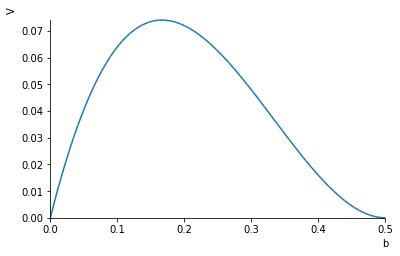

<IPython.core.display.Math object>

In [4]:
plot(V.subs({a: 1}), (b, 0, .5), xlabel='b', ylabel='V')
display(Math(sym.latex('V_{a=1}^{max}(b=%s)=%s'
                       %(roots[0].evalf(n=4, subs={a: 1}), V.evalf(n=3, subs={a: 1, b: roots[0]})))))

 - Note that although the problem above is a case of nonlinear constrained optimization, because the objective function is univariate, well-conditioned and the constraints are linear inequalities, the optimization is simple. Unfortunately, this is seldom the case.

## Curve fitting as an optimization problem

Curve fitting is the process of fitting a model, expressed in terms of a mathematical function, that depends on adjustable parameters to a series of data points and once adjusted, that curve has the best fit to the data points.

The general approach to the fitting procedure involves the definition of a merit function that measures the agreement between data and model. The model parameters are then adjusted to yield the best-fit parameters as a problem of minimization (an optimization problem, where the merit function is the cost function).  

A classical solution, termed least-squares fitting, is to find the best fit by minimizing the sum of the squared differences between data points and the model function (the sum of squared residuals as the merit function).

For more on curve fitting see the video below and the notebook [Curve fitting](http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb).

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Rxp7o7_RxII', width=480, height=360, rel=0)

## Gradient descent

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function ([Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)).  
In the gradient descent algorithm, a local minimum of a function is found starting from an initial point and taking steps proportional to the negative of the derivative of the function (gradient) at the current point and we evaluate if the current point is lower than then the previous point until a local minimum in reached (hopefully).  

It follows that, if

\begin{equation}
x_{n+1} = x_n - \gamma \nabla f(x)
\label{}
\end{equation}

for $\gamma$ small enough, then $f(x_{n}) \geq f(x_{n+1})$.

This process is repeated iteratively until the step size (which is proportional to the gradient!) is below a required precision (hopefully the sequence $x_{n}$ converges to the desired local minimum).

### Example 2: Minimum of a function by gradient descent

From https://en.wikipedia.org/wiki/Gradient_descent:  
Calculate the minimum of $f(x)=x^4-3x^3+2$.

In [ ]:
# From https://en.wikipedia.org/wiki/Gradient_descent
# The local minimum of $f(x)=x^4-3x^3+2$ is at x=9/4

cur_x = 6               # The algorithm starts at x=6
gamma = 0.01            # step size multiplier
precision = 0.00001
step_size = 1           # initial step size
max_iters = 10000       # maximum number of iterations
iters = 0               # iteration counter


f  = lambda x: x**4 - 3*x**3 + 2  # lambda function for f(x)
df = lambda x: 4*x**3 - 9*x**2    # lambda function for the gradient of f(x)

while (step_size > precision) & (iters < max_iters):
    prev_x = cur_x
    cur_x -= gamma*df(prev_x)
    step_size = abs(cur_x - prev_x)
    iters+=1

print('True local minimum at {} with function value {}.'.format(9/4, f(9/4)))
print('Local minimum by gradient descent at {} with function value {}.'.format(cur_x, f(cur_x)))

## Multivariate optimization
 
When there is more than one design variable (the cost function depends on more than one variable), it's a multivariate optimization. The general idea of finding minimum and maximum values where the derivatives are zero still holds for a multivariate function. The second derivative of a multivariate function can be described by the Hessian matrix:

\begin{equation}
\mathbf{H} = \begin{bmatrix}{\dfrac  {\partial ^{2}f}{\partial x_{1}^{2}}}&{\dfrac  {\partial ^{2}f}{\partial x_{1}\,\partial x_{2}}}&\cdots &{\dfrac  {\partial ^{2}f}{\partial x_{1}\,\partial x_{n}}}\\[2.2ex]{\dfrac  {\partial ^{2}f}{\partial x_{2}\,\partial x_{1}}}&{\dfrac  {\partial ^{2}f}{\partial x_{2}^{2}}}&\cdots &{\dfrac  {\partial ^{2}f}{\partial x_{2}\,\partial x_{n}}}\\[2.2ex]\vdots &\vdots &\ddots &\vdots \\[2.2ex]{\dfrac  {\partial ^{2}f}{\partial x_{n}\,\partial x_{1}}}&{\dfrac  {\partial ^{2}f}{\partial x_{n}\,\partial x_{2}}}&\cdots &{\dfrac  {\partial ^{2}f}{\partial x_{n}^{2}}}
\end{bmatrix}
\label{}
\end{equation}

Let's see now a classical problem in biomechanics where optimization is useful and there is more than one design variable.

## The distribution problem in biomechanics

Using the inverse dynamics approach in biomechanics, we can determine the net force and torque acting on a joint if we know the external forces on the segments and the kinematics and inertial properties of the segments. But with this approach we are unable to determine the individual muscles forces that  created such torque, as expressed in the following equation:

\begin{equation}
M_{total} = M_1 + M_2 + \dots + M_n = r_1F_1 + r_2F_2 + \dots + r_nF_n
\label{}
\end{equation}

where $r_i$ is the moment arm of the force $F_i$ that generates a torque $M_i$, a parcel of the (known) total torque $M_{total}$.  

Even if we know the moment arm of each muscle (e.g., from cadaveric data or from image analysis), the equation above has $n$ unknowns. Because there is more than one muscle that potentially created such torque, there are more unknowns than equations, and the problem is undetermined. So, the problem is how to find how the torque is distributed among the muscles of that joint.

One solution is to consider that we (biological systems) optimize our effort in order to minimize energy expenditure, stresses on our tissues, fatigue, etc. The principle of least action, stated in the opening of this text, is an allusion that optimization might be ubiquitous in nature. With this rationale, let's solve the distribution problem in biomechanics using optimization and find the minimum force of each muscle necessary to complete a given task.

The following cost functions have been proposed to solve the distribution problem in biomechanics:

\begin{equation}
\begin{array}{l l}
\displaystyle\sum_{i=1}^N F_i \quad &\text{e.g., Seireg and Arkivar (1973)}
\\
\displaystyle\sum_{i=1}^N F_i^2 \quad &
\\
\displaystyle\sum_{i=1}^N \left(\dfrac{F_i}{pcsa_i}\right)^2 \quad &\text{e.g., Crowninshield and Brand (1981)}
\\
\displaystyle\sum_{i=1}^N \left(\dfrac{F_i}{M_{max,i}}\right)^3 \quad &\text{e.g., Herzog (1987)}
\end{array}
\label{}
\end{equation}

Where $pcsa_i$ is the physiological cross-sectional area of muscle $i$ and $M_{max,i}$ is the maximum torque muscle $i$ can produce.  
Each muscle force $F_i$ is a design variable and the following constraints must be satisfied:

\begin{equation}
\begin{array}{l l}
0 \leq F_i \leq F_{max}
\\
\displaystyle\sum_{i=1}^N r_i \times F_i = M
\end{array}
\label{}
\end{equation}

Let's apply this concept to solve a distribution problem in biomechanics.

### Muscle force estimation

Consider the following main flexors of the elbow joint (see figure below): biceps long head, biceps short head, and brachialis. Suppose that the elbow net joint torque determined using inverse dynamics is 20 Nm (flexor). How much each of these muscles contributed to the net torque?

<div class='center-align'><figure><img src='./../images/elbowflexors.png' alt='Elbow flexors'/> <figcaption><center><i>Figure. A view in OpenSim of the arm26 model showing three elbow flexors (Biceps long and short heads and Brachialis).</i></center></figcaption> </figure></div>

For the optimization, we will need experimental data for the moment arm, maximum moment, and *pcsa* of each muscle. Let's import these data from the OpenSim arm26 model:

In [ ]:
# time elbow_flexion BIClong BICshort BRA
r_ef = np.loadtxt('./../data/r_elbowflexors.mot', skiprows=7)
f_ef = np.loadtxt('./../data/f_elbowflexors.mot', skiprows=7)

The maximum isometric force of these muscles are defined in the arm26 model as: Biceps long head: 624.3 N, Biceps short head: 435.56 N, and Brachialis: 987.26 N. Let's compute the mamimum torques that each muscle could produce considering a static situation at the different elbow flexion angles:

In [ ]:
m_ef = r_ef*1
m_ef[:, 2:] = r_ef[:, 2:]*f_ef[:, 2:]

And let's visualize these data:

In [ ]:
labels = ['Biceps long head', 'Biceps short head', 'Brachialis']
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(10, 4))
ax[0].plot(r_ef[:, 1], r_ef[:, 2:])
#ax[0].set_xlabel('Elbow angle $(\,^o)$')
ax[0].set_title('Moment arm (m)')
ax[1].plot(f_ef[:, 1], f_ef[:, 2:])
ax[1].set_xlabel('Elbow angle $(\,^o)$', fontsize=16)
ax[1].set_title('Maximum force (N)')
ax[2].plot(m_ef[:, 1], m_ef[:, 2:])
#ax[2].set_xlabel('Elbow angle $(\,^o)$')
ax[2].set_title('Maximum torque (Nm)')
ax[2].legend(labels, loc='best', framealpha=.5)
ax[2].set_xlim(np.min(r_ef[:, 1]), np.max(r_ef[:, 1]))
plt.tight_layout()
plt.show()

These data don't have the *pcsa* value of each muscle. We will estimate the *pcsa* considering that the amount of maximum muscle force generated per area is constant and equal to 50N/cm$^2$. Consequently, the *pcsa* (in cm$^2$) for each muscle is:

In [ ]:
a_ef = np.array([624.3, 435.56, 987.26])/50  # 50 N/cm2
print(a_ef)

### Static versus dynamic optimization

In the context of biomechanics, we can solve the distribution problem separately for each angle (instant) of the elbow; we will refer to that as static optimization. However, there is no guarantee that when we analyze all these solutions across the range of angles, they will be the best solution overall. One reason is that static optimization ignores the time history of the muscle force. Dynamic optimization refers to the optimization over a period of time. For such, we will need to input a cost function spanning the entire period of time at once. Dynamic optimization usually has a higher computational cost than static optimization.

For now, we will solve the present problem using static optimization.

### Solution of the optimization problem

For the present case, we are dealing with a problem of minimization, multidimensional (function of several variables), nonlinear, constrained, and we can't assume that the cost function is convex. Numerical optimization is hardly a simple task. There are many different algorithms and public and commercial software for performing optimization. For instance, look at [NEOS Server](http://www.neos-server.org/neos/), a free internet-based service for solving numerical optimization problems.  
We will solve the present problem using the [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) package which provides several optimization algorithms. We will use the function `minimize`:

```python
scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
"""Minimization of scalar function of one or more variables."""
```

Now, let's write Python functions for each cost function:

In [ ]:
from scipy.optimize import minimize

In [ ]:
def cf_f1(x):
    """Cost function: sum of forces."""  
    return x[0] + x[1] + x[2]

def cf_f2(x):
    """Cost function: sum of forces squared."""
    return x[0]**2 + x[1]**2 + x[2]**2

def cf_fpcsa2(x, a):
    """Cost function: sum of squared muscle stresses."""
    return (x[0]/a[0])**2 + (x[1]/a[1])**2 + (x[2]/a[2])**2

def cf_fmmax3(x, m):
    """Cost function: sum of cubic forces normalized by moments."""
    return (x[0]/m[0])**3 + (x[1]/m[1])**3 + (x[2]/m[2])**3

Let's also define the Jacobian for each cost function (which is an optional parameter for the optimization):

In [ ]:
def cf_f1d(x):
    """Derivative of cost function: sum of forces."""
    dfdx0 = 1
    dfdx1 = 1
    dfdx2 = 1
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_f2d(x):
    """Derivative of cost function: sum of forces squared."""
    dfdx0 = 2*x[0]
    dfdx1 = 2*x[1]
    dfdx2 = 2*x[2]
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_fpcsa2d(x, a):
    """Derivative of cost function: sum of squared muscle stresses."""
    dfdx0 = 2*x[0]/a[0]**2
    dfdx1 = 2*x[1]/a[1]**2
    dfdx2 = 2*x[2]/a[2]**2
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_fmmax3d(x, m):
    """Derivative of cost function: sum of cubic forces normalized by moments."""
    dfdx0 = 3*x[0]**2/m[0]**3
    dfdx1 = 3*x[1]**2/m[1]**3
    dfdx2 = 3*x[2]**2/m[2]**3
    return np.array([dfdx0, dfdx1, dfdx2])

Let's define initial values:

In [ ]:
M = 20  # desired torque at the elbow
iang = 69  # which will give the closest value to 90 degrees
r  = r_ef[iang, 2:]
f0 = f_ef[iang, 2:]
a  = a_ef
m  = m_ef[iang, 2:]
x0 = f_ef[iang, 2:]/10  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

Inequality constraints (such as boundaries in our problem) can be entered with the parameter `bounds` to the `minimize` function:

In [ ]:
bnds = ((0, f0[0]), (0, f0[1]), (0, f0[2]))

Equality constraints (such as the sum of torques should equals the desired torque in our problem), as well as inequality constraints, can be entered with the parameter `constraints` to the `minimize` function (and we can also opt to enter the Jacobian of these constraints):

In [ ]:
# use this in combination with the parameter bounds:
cons = ({'type': 'eq',
         'fun' : lambda x, r, f0, M: np.array([r[0]*x[0] + r[1]*x[1] + r[2]*x[2] - M]), 
         'jac' : lambda x, r, f0, M: np.array([r[0], r[1], r[2]]), 'args': (r, f0, M)})

In [ ]:
# to enter everything as constraints:
cons = ({'type': 'eq',
         'fun' : lambda x, r, f0, M: np.array([r[0]*x[0] + r[1]*x[1] + r[2]*x[2] - M]), 
         'jac' : lambda x, r, f0, M: np.array([r[0], r[1], r[2]]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[0]-x[0],
         'jac' : lambda x, r, f0, M: np.array([-1, 0, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[1]-x[1],
         'jac' : lambda x, r, f0, M: np.array([0, -1, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[2]-x[2],
         'jac' : lambda x, r, f0, M: np.array([0, 0, -1]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[0],
         'jac' : lambda x, r, f0, M: np.array([1, 0, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[1],
         'jac' : lambda x, r, f0, M: np.array([0, 1, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[2],
         'jac' : lambda x, r, f0, M: np.array([0, 0, 1]), 'args': (r, f0, M)})

Although more verbose, if all the Jacobians of the constraints are also informed, this alternative seems better than informing bounds for the optimization process (less error in the final result and less iterations).  

Given the characteristics of the problem, if we use the function `minimize` we are limited to the SLSQP (Sequential Least SQuares Programming) solver.  

Finally, let's run the optimization for the four different cost functions and find the optimal muscle forces:

In [ ]:
f1r = minimize(fun=cf_f1, x0=x0, args=(), jac=cf_f1d,
               constraints=cons, method='SLSQP',
               options={'disp': True})

In [ ]:
f2r = minimize(fun=cf_f2, x0=x0, args=(), jac=cf_f2d,
               constraints=cons, method='SLSQP',
               options={'disp': True})

In [ ]:
fpcsa2r = minimize(fun=cf_fpcsa2, x0=x0, args=(a,), jac=cf_fpcsa2d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})

In [ ]:
fmmax3r = minimize(fun=cf_fmmax3, x0=x0, args=(m,), jac=cf_fmmax3d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})

Let's compare the results for the different cost functions:

In [ ]:
dat = np.vstack((np.around(r*100,1), np.around(a,1), np.around(f0,0), np.around(m,1)))
opt = np.around(np.vstack((f1r.x, f2r.x, fpcsa2r.x, fmmax3r.x)), 1)
er = ['-', '-', '-', '-',
      np.sum(r*f1r.x)-M, np.sum(r*f2r.x)-M, np.sum(r*fpcsa2r.x)-M, np.sum(r*fmmax3r.x)-M]
data = np.vstack((np.vstack((dat, opt)).T, er)).T

rows = ['$\text{Moment arm}\;[cm]$', '$pcsa\;[cm^2]$', '$F_{max}\;[N]$', '$M_{max}\;[Nm]$',
        '$\sum F_i$', '$\sum F_i^2$', '$\sum(F_i/pcsa_i)^2$', '$\sum(F_i/M_{max,i})^3$']
cols = ['Biceps long head', 'Biceps short head', 'Brachialis', 'Error in M']
df = pd.DataFrame(data, index=rows, columns=cols)
print('\nComparison of different cost functions for solving the distribution problem')
df

## Comments

The results show that the estimations for the muscle forces depend on the cost function used in the optimization. Which one is correct? This is a difficult question and it's dependent on the goal of the actual task being modeled. Glitsch and Baumann (1997) investigated the effect of different cost functions on the optimization of walking and running and the predicted muscles forces were compared with the electromyographic activity of the corresponding muscles of the lower limb. They found that, among the analyzed cost functions, the minimization of the sum of squared muscle stresses resulted in the best similarity with the actual electromyographic activity.

In general, one should always test different algorithms and different initial values before settling for the solution found. Downey (2011), Kitchin (2013), and Kiusalaas (2013) present more examples on numerical optimization. The [NEOS Guide](http://neos-guide.org/) is a valuable source of information on this topic and [OpenOpt](http://openopt.org/) is a good alternative software for numerical optimization in Python.

## Exercises

1. Find the extrema in the function $f(x)=x^3-7.5x^2+18x-10$ analytically and determine if they are minimum or maximum.  
2. Find the minimum in the $f(x)=x^3-7.5x^2+18x-10$ using the gradient descent algorithm.  
2. Regarding the distribution problem for the elbow muscles presented in this text:  
    a. Test different initial values for the optimization.  
    b. Test other values for the elbow angle where the results are likely to change.   
    
3. In an experiment to estimate forces of the elbow flexors, through inverse dynamics it was found an elbow flexor moment of 10 Nm.  
Consider the following data for maximum force (F0), moment arm (r), and pcsa (A) of the brachialis, brachioradialis, and biceps brachii muscles: F0 (N): 1000, 250, 700; r (cm): 2, 5, 4; A (cm$^2$): 33, 8, 23, respectively (data from Robertson et al. (2013)).  
    a. Use static optimization to estimate the muscle forces.  
    b. Test the robustness of the results using different initial values for the muscle forces.  
    c. Compare the results for different cost functions.

## References

- Bergstra B, Bengio Y (2012) [Random Search for Hyper-Parameter Optimization](http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf). Journal of Machine Learning Research, 13, 281-305.  
- Crowninshield RD, Brand RA (1981) [A physiologically based criterion of muscle force prediction in locomotion](http://www.ncbi.nlm.nih.gov/pubmed/7334039). Journal of Biomechanics, 14, 793–801.  
- Downey AB (2014) [Physical Modeling in MATLAB](http://greenteapress.com/wp/physical-modeling-in-matlab-2e/). 2nd edition. Green Tea Press.  
- Herzog W (1987) [Individual muscle force estimations using a non-linear optimal design](http://www.ncbi.nlm.nih.gov/pubmed/3682873). J Neurosci Methods, 21, 167-179.  
- Glitsch U, Baumann W (1997) [The three-dimensional determination of internal loads in the lower extremity](http://www.ncbi.nlm.nih.gov/pubmed/9456380). Journal of Biomechanics, 30, 1123–1131.  
- Kitchin J (2013) [pycse - Python Computations in Science and Engineering](http://kitchingroup.cheme.cmu.edu/pycse/).  
- Kiusalaas (2013) [Numerical methods in engineering with Python 3](http://books.google.com.br/books?id=aJkXoxxoCoUC). 3rd edition. Cambridge University Press.  
- Nigg BM and Herzog W (2006) [Biomechanics of the Musculo-skeletal System](https://books.google.com.br/books?id=hOIeAQAAIAAJ&dq=editions:ISBN0470017678). 3rd Edition. Wiley.  
- Robertson G, Caldwell G, Hamill J, Kamen G (2013) [Research Methods in Biomechanics](http://books.google.com.br/books?id=gRn8AAAAQBAJ). 2nd Edition. Human Kinetics.  
- Seireg A, Arvikar RJ (1973) [A mathematical model for evaluation of forces in lower extremeties of the musculo-skeletal system](http://www.ncbi.nlm.nih.gov/pubmed/4706941). Journal of Biomechanics, 6,  313–322, IN19–IN20, 323–326.